In [218]:
# Importing Required Libraries

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [222]:
#Read Csv Data

In [224]:
df = pd.read_csv("titanic.csv")

In [226]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [230]:
# Numerical & Categorical Features

In [232]:
df_num = df[["Age",  "Parch", "Fare"]]
df_cat = df[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

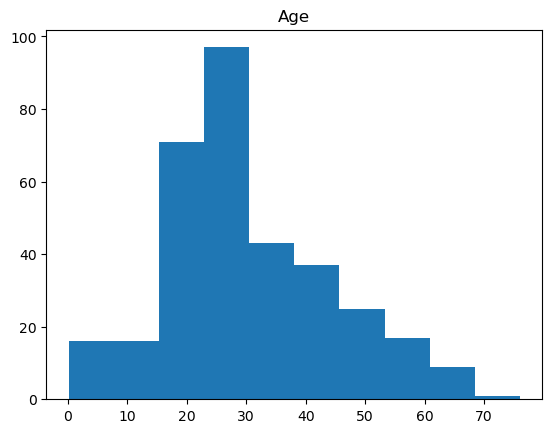

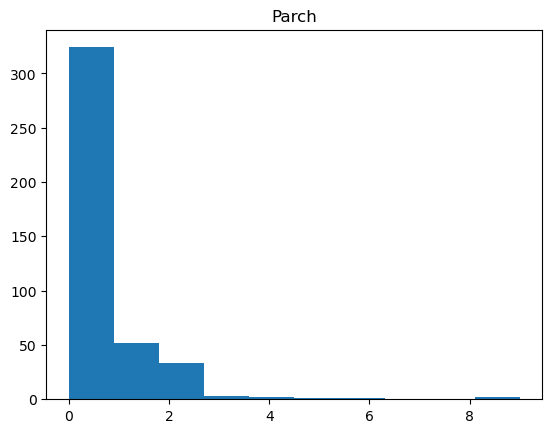

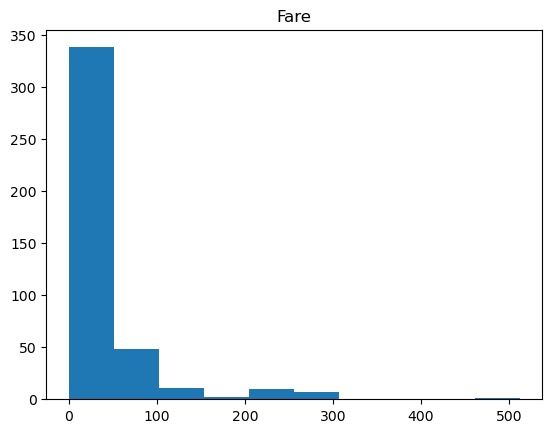

In [234]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

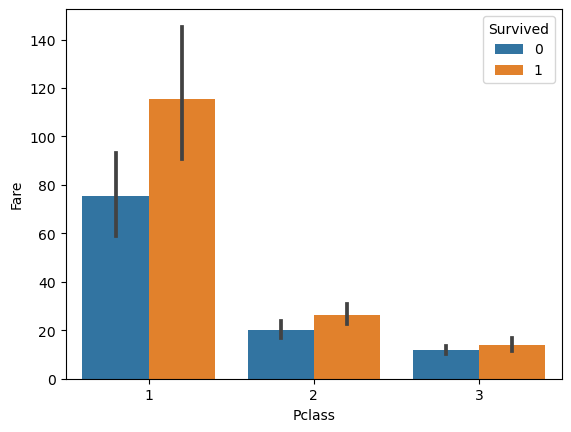

In [236]:
df["Survived"] = df["Survived"].astype(str)
sns.barplot(data=df, x="Pclass", y="Fare", hue="Survived")
plt.show()

In [238]:
pd.pivot_table(df, index="Survived", values=["Age",  "Parch", "Fare"])

,Age,Fare,Parch
Survived,,,
0,30.272732,27.527877,0.274436
1,30.272362,49.747699,0.598684


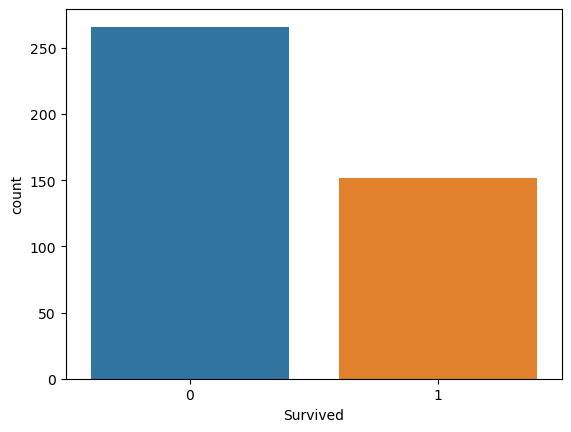

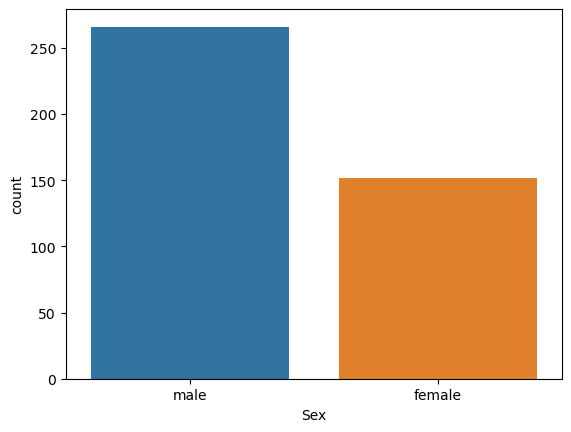

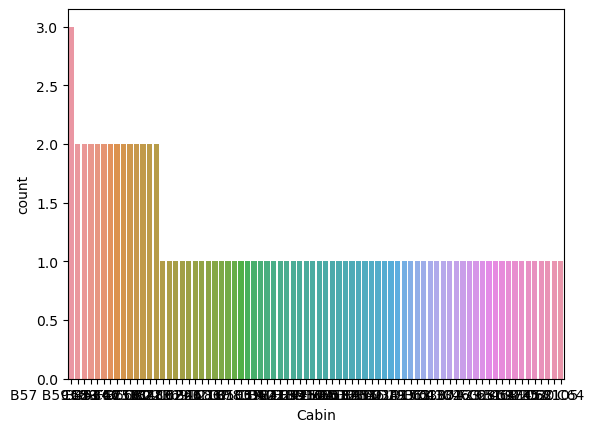

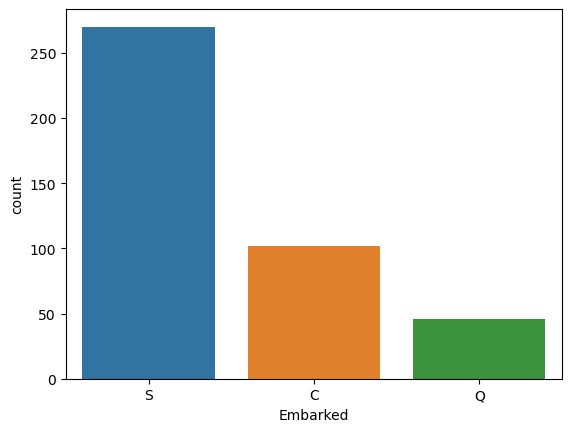

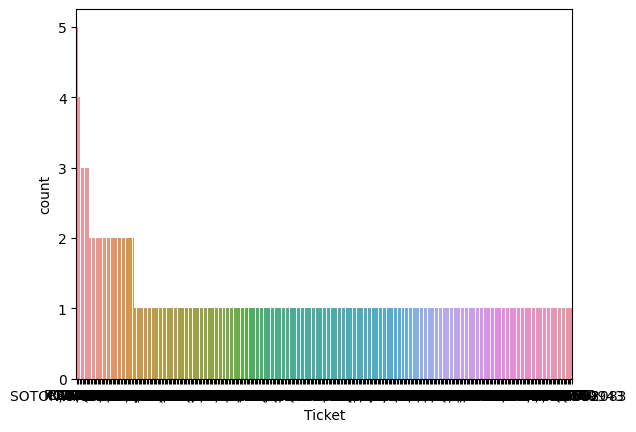

In [240]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [242]:
x = pd.DataFrame(
    (
        pd.pivot_table(
            df,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        df, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        df,
        index="Survived",
        columns="Embarked",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x


Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72

Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88



Sex,female,male
Survived,,
0,NaN,266.0
1,152.0,NaN


In [244]:
# data preprocessing and handling missing values

In [246]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [248]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [250]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [252]:
# Data CLeaning

In [254]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [256]:
df = df.assign(
    Age=df['Age'].fillna(df['Age'].median()),
    Fare=df['Fare'].fillna(df['Fare'].median()),
    Embarked=df['Embarked'].fillna(df['Embarked'].mode()[0])
)

In [258]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [260]:
print("Missing values after preprocessing:\n", df.isnull().sum())

Missing values after preprocessing:
 Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [262]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [268]:
#Log Transformation of Fare

In [270]:
df["Fare"] = np.log(df["Fare"] + 1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


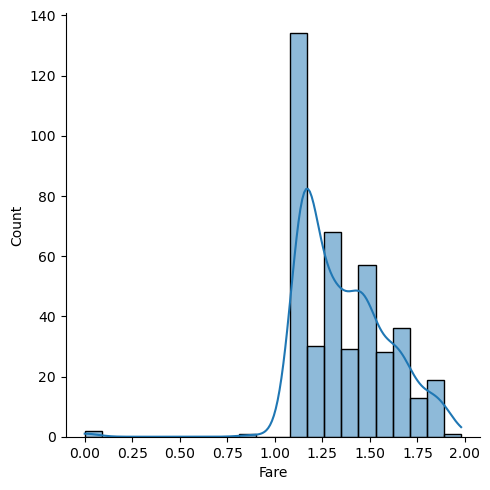

In [272]:
sns.displot(df["Fare"], kde=True)

In [274]:
#Correlation Heatmap of Numerical Features

<Axes: >

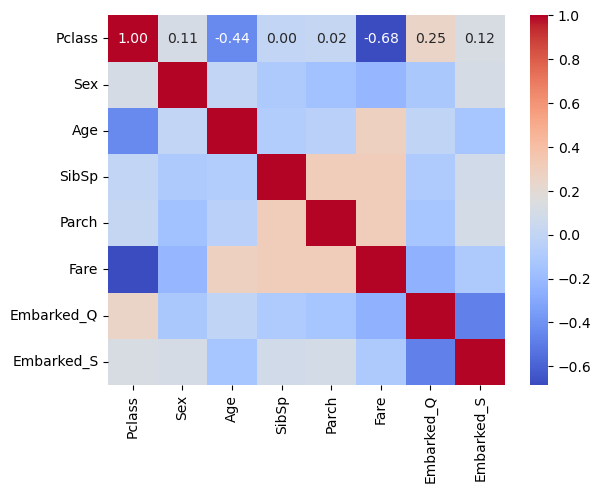

In [276]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [278]:
#Encoding Categorical Variables using Label Encoding

In [280]:
cols = ['Sex'] 
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
    df.head()

In [282]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

In [165]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy 1.0
CV SCORE : 1.0


In [159]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


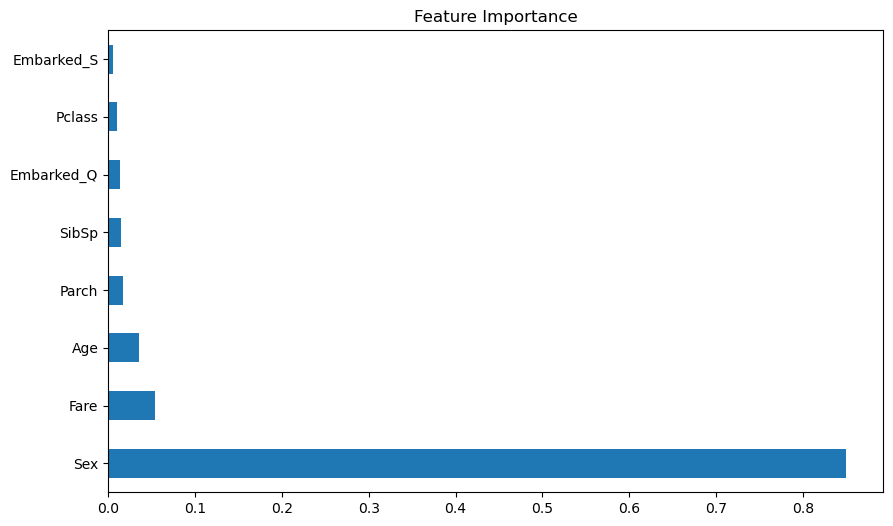

In [67]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [172]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [174]:
from lightgbm import LGBMClassifier

In [176]:
model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 112, number of negative: 201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 313, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357827 -> initscore=-0.584806
[LightGBM] [Info] Start training from score -0.584806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [182]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy 1.0


In [184]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 1.0


In [202]:
X_test = df.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1, errors="ignore")

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

print(X_test.head())  


  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
0        0       3    1  34.5      0      0  2.178064        True       False
1        1       3    0  47.0      1      0  2.079442       False        True
2        0       2    1  62.0      0      0  2.369075        True       False
3        0       3    1  27.0      0      0  2.268252       False        True
4        1       3    0  22.0      1      1  2.586824       False        True


In [216]:
df["Survived"] = df["Survived"].astype(int)
columns_to_drop = ["Survived", "PassengerId", "Name", "Cabin", "Ticket"]
existing_columns = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns, axis=1)

y = df["Survived"]

X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(pred[:10])


[0 1 1 0 0 0 0 1 0 1]
